In [1]:
import os
import sys
!pip install --upgrade numpy
!pip install --upgrade pandas
import pandas as pd # Import pandas in forecast.py file



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 111.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define the folder path inside Google Drive
drive_folder = "/content/drive/My Drive/scripts"

# Append it to sys.path to allow importing modules
sys.path.append(os.path.abspath(drive_folder))

In [4]:
from forecast import StockForecasting

forecasting = StockForecasting()

In [5]:
# Load the data
stoke_data = forecasting.import_data('/content/stock_data.csv')

# Trained model and scaler path
model_path_tsla = '../content/drive/My Drive/models/arima_model_TSLA.pkl'
scaler_path_tsla = '../content/drive/My Drive/models/scaler_TSLA.joblib'

In [6]:
print(stoke_data.index)

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2024-10-17', '2024-10-18', '2024-10-21', '2024-10-22',
               '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-28',
               '2024-10-29', '2024-10-30'],
              dtype='datetime64[ns]', name='Date', length=2474, freq=None)


# forcasting the future price of TSLA

In [7]:
TSLA_ARIMA_Predictions = forecasting.generate_future_predictions(stoke_data, 'TSLA', model_path_tsla, scaler_path_tsla, 365)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# visualization

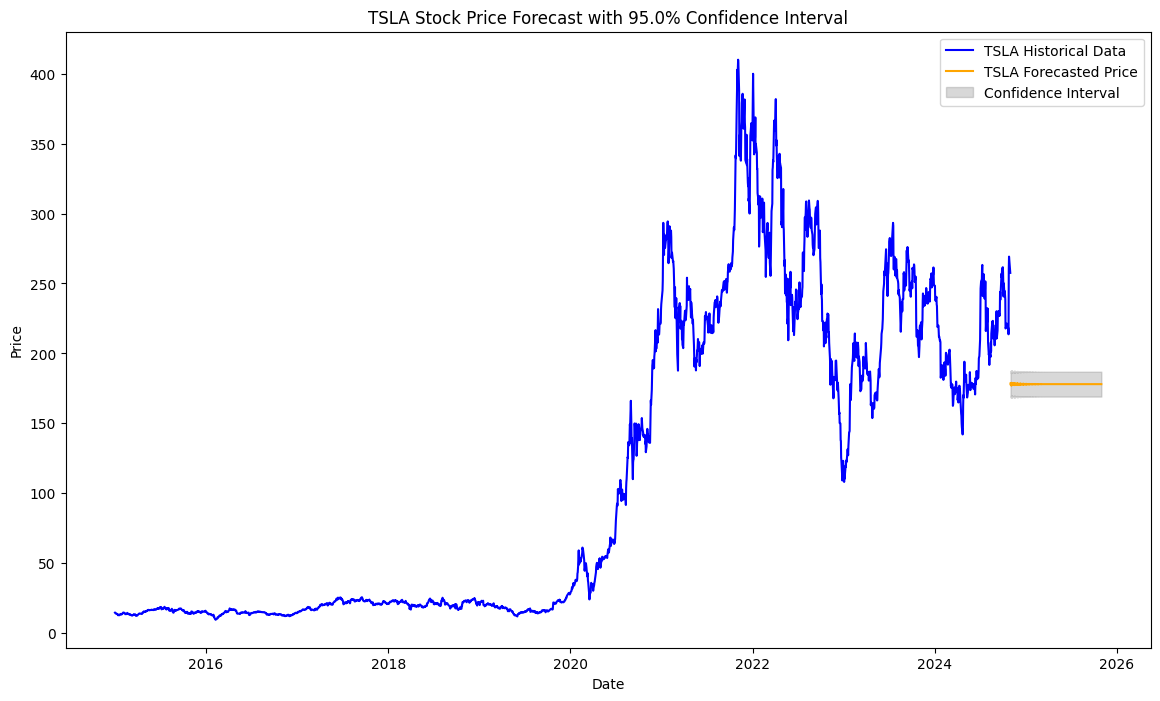

In [8]:
forecasting.visualize_forecast('TSLA', stoke_data, TSLA_ARIMA_Predictions, 0.05)

# evaluation

In [9]:
forecasting.evaluate_forecast('TSLA', TSLA_ARIMA_Predictions)

Trend Evaluation: The forecast indicates a `decreasing` trend.
Volatility Evaluation: The forecasted data exhibits a volatility level of $2.75$.
Risk Indicator: The downward trend suggests potential risks with price declines.


In [12]:
# Trained model and scaler path
model_path_bnd = '../content/drive/My Drive/models/arima_model_BND.pkl'
scaler_path_bnd = '../content/drive/My Drive/models/scaler_BND.joblib'

# Trained model and scaler path
model_path_spy = '../content/drive/My Drive/models/arima_model_SPY.pkl'
scaler_path_spy = '../content/drive/My Drive/models/scaler_SPY.joblib'

In [13]:
BND_ARIMA_Predictions = forecasting.generate_future_predictions(stoke_data, 'BND', model_path_bnd, scaler_path_bnd, 365)
SPY_ARIMA_Predictions = forecasting.generate_future_predictions(stoke_data, 'SPY', model_path_spy, scaler_path_spy, 365)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [20]:
  def combinee_and_export(data1, data2, data3):
        # Concatenate along the Date index, keeping only rows with matching indices
        combined_df = pd.concat([data1, data2, data3], axis=1, join='inner').reset_index()
        combined_df.to_csv("/content/forecast_combined.csv")

In [21]:
combinee_and_export(TSLA_ARIMA_Predictions, BND_ARIMA_Predictions, SPY_ARIMA_Predictions)

In [22]:
df = pd.read_csv('/content/forecast_combined.csv')

In [23]:
df.head()

,Unnamed: 0,index,TSLA,BND,SPY
0,0,2024-10-31,178.535295,69.996396,376.146826
1,1,2024-11-01,177.300575,69.957360,374.549608
2,2,2024-11-02,178.864823,69.982981,374.741260
3,3,2024-11-03,177.095152,70.011681,374.081341
4,4,2024-11-04,178.938422,70.024876,373.421528
